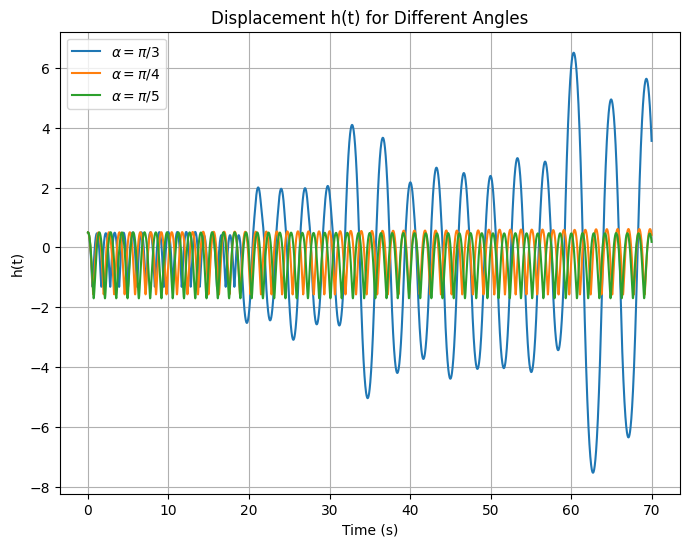

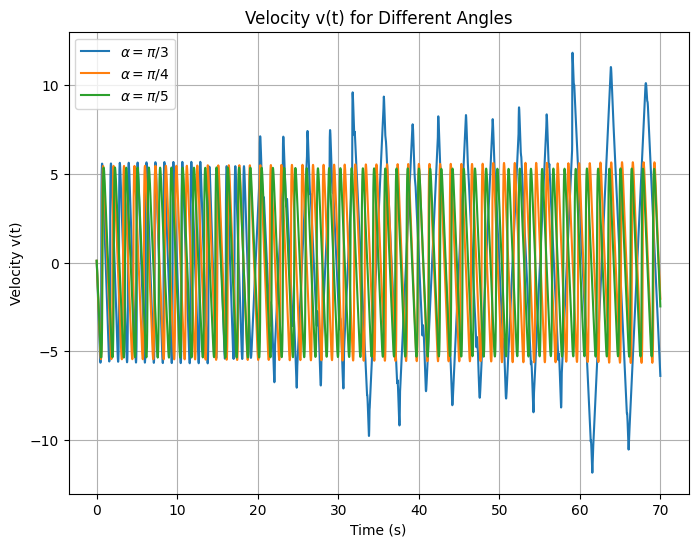

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def sigma(alpha, a, b):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

def f(h, sigma):
    return np.sqrt(1 - (h / sigma)**2) if abs(h) < sigma else 0

def h_equation(t, y, alpha, a, b, g):
    h, v = y
    sigma_val = sigma(alpha, a, b)
    
    if abs(h) < sigma_val:
        f_val = f(h, sigma_val)
        if f_val == 0:
            return [v, -g * np.sign(h)]
        term1 = - (2 * g * (sigma_val**2 * (h + np.pi) + sigma_val**3 * np.arcsin(h / sigma_val) * f_val - 2 * np.pi * h**2)) / (np.pi * sigma_val**3 * f_val)
        term2 = (4 * g * h / (np.pi * sigma_val)) * f_val
        return [v, term1 + term2]
    else:
        return [v, -g * np.sign(h)]

def solve_h(a, b, alpha, h0, v0, g=9.81, t_max=70, dt=0.01):
    t_span = (0, t_max)
    t_eval = np.arange(0, t_max, dt)
    sol = solve_ivp(h_equation, t_span, [h0, v0], t_eval=t_eval, args=(alpha, a, b, g), method='RK45')
    return sol

# Parameters
a, b = 2.0, 1.0  # Fixed values of a and b
alphas = [np.pi / 3, np.pi / 4, np.pi / 5]  # Different angles
alpha_labels = [r"$\alpha = \pi/3$", r"$\alpha = \pi/4$", r"$\alpha = \pi/5$"]  # Labels for legend
h0, v0 = 0.5, 0.1  # Initial conditions

# Plot h(t) for different alphas
plt.figure(figsize=(8, 6))
for alpha, label in zip(alphas, alpha_labels):
    sol = solve_h(a, b, alpha, h0, v0)
    plt.plot(sol.t, sol.y[0], label=label)
plt.xlabel("Time (s)")
plt.ylabel("h(t)")
plt.title("Displacement h(t) for Different Angles")
plt.legend()
plt.grid()
plt.show()

# Plot v(t) for different alphas
plt.figure(figsize=(8, 6))
for alpha, label in zip(alphas, alpha_labels):
    sol = solve_h(a, b, alpha, h0, v0)
    plt.plot(sol.t, sol.y[1], label=label)
plt.xlabel("Time (s)")
plt.ylabel("Velocity v(t)")
plt.title("Velocity v(t) for Different Angles")
plt.legend()
plt.grid()
plt.show()



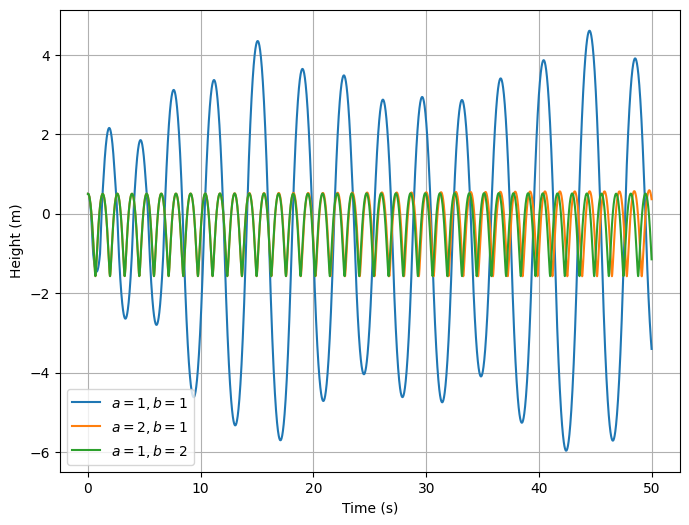

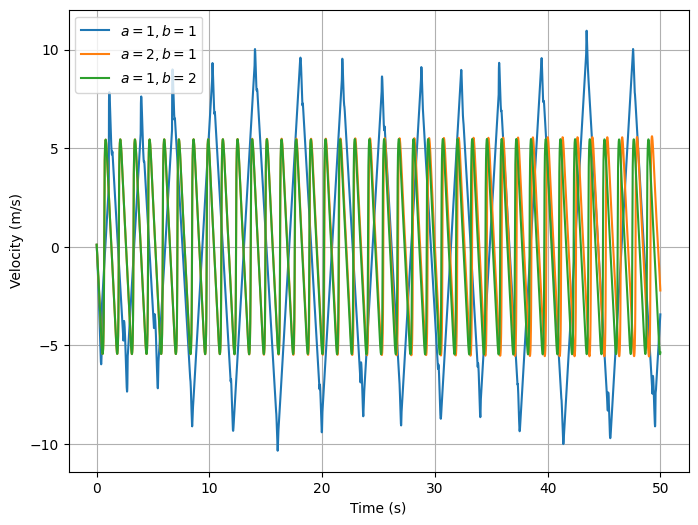

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def sigma(alpha, a, b):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

def f(h, sigma):
    return np.sqrt(1 - (h / sigma)**2) if abs(h) < sigma else 0

def h_equation(t, y, alpha, a, b, g):
    h, v = y
    sigma_val = sigma(alpha, a, b)
    
    if abs(h) < sigma_val:
        f_val = f(h, sigma_val)
        if f_val == 0:
            return [v, -g * np.sign(h)]
        term1 = - (2 * g * (sigma_val**2 * (h + np.pi) + sigma_val**3 * np.arcsin(h / sigma_val) * f_val - 2 * np.pi * h**2)) / (np.pi * sigma_val**3 * f_val)
        term2 = (4 * g * h / (np.pi * sigma_val)) * f_val
        return [v, term1 + term2]
    else:
        return [v, -g * np.sign(h)]

def solve_h(a, b, alpha, h0, v0, g=9.81, t_max=50, dt=0.01):
    t_span = (0, t_max)
    t_eval = np.arange(0, t_max, dt)
    sol = solve_ivp(h_equation, t_span, [h0, v0], t_eval=t_eval, args=(alpha, a, b, g), method='RK45')
    return sol

# Parameters
a_b_values = [(1, 1), (2, 1), (1, 2)]
alpha = np.pi / 4  # Fixed angle
h0, v0 = 0.5, 0.1  # Initial conditions

# Plot h(t) for different (a, b)
plt.figure(figsize=(8, 6))
for a, b in a_b_values:
    sol = solve_h(a, b, alpha, h0, v0)
    plt.plot(sol.t, sol.y[0], label=f"$a={a}, b={b}$")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid()
plt.show()

# Plot v(t) for different (a, b)
plt.figure(figsize=(8, 6))
for a, b in a_b_values:
    sol = solve_h(a, b, alpha, h0, v0)
    plt.plot(sol.t, sol.y[1], label=f"$a={a}, b={b}$")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()


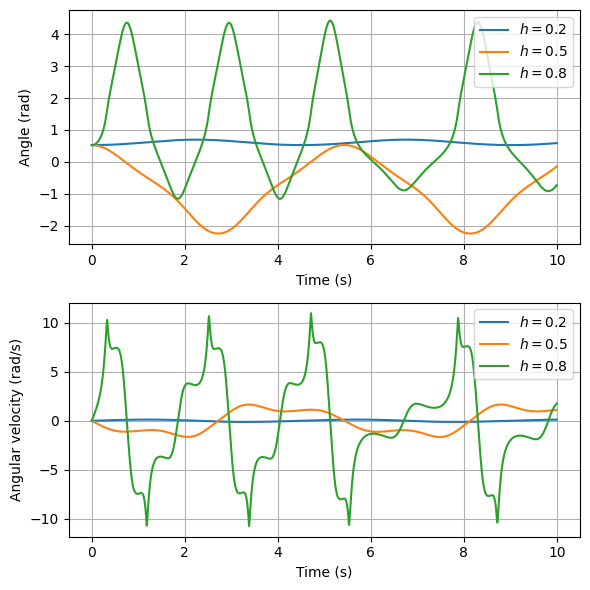

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
a, b, g = 1.0, 0.8, 9.81  # Example values
h_values = [0.2, 0.5, 0.8]  # Different h values to test

# Define sigma and f(h, sigma)
def sigma(alpha):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

def f(h, sigma_val):
    return np.sqrt(1 - h**2 / sigma_val**2) if abs(h) <= sigma_val else 0

# Partial derivatives of V
def dV_du(alpha, h):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha)
    f_val = f(h, sigma_val)
    
    if f_val == 0:
        return 0

    term1 = - (2 * a**2 * g * u * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * a**2 * g * h**2 * u) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * a**2 * g * u * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

def dV_dv(alpha, h):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha)
    f_val = f(h, sigma_val)
    
    if f_val == 0:
        return 0

    term1 = - (2 * b**2 * g * v * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * b**2 * g * h**2 * v) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * b**2 * g * v * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

# Right-hand side of the equation
def rhs(t, y, h):
    alpha, omega = y
    sigma_val = sigma(alpha)

    # Check condition |h| <= sigma
    if abs(h) <= sigma_val:
        nVn = np.cos(alpha)**2 * dV_dv(alpha, h) + np.sin(alpha)**2 * dV_du(alpha, h)
        domega_dt = (4 / (a**2 + b**2)) * nVn
    else:
        domega_dt = 0  # No force outside sigma range

    return [omega, domega_dt]

# Time parameters
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Initial conditions
alpha0, omega0 = np.pi / 6, 0  # Initial angle and angular velocity

# Create figures
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)

# Solve and plot results for different h values
for h in h_values:
    sol = solve_ivp(rhs, t_span, [alpha0, omega0], t_eval=t_eval, args=(h,), method='RK45')
    plt.plot(sol.t, sol.y[0], label=fr"$h = {h}$")

plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()

plt.grid()

plt.subplot(2, 1, 2)

for h in h_values:
    sol = solve_ivp(rhs, t_span, [alpha0, omega0], t_eval=t_eval, args=(h,), method='RK45')
    plt.plot(sol.t, sol.y[1], label=fr"$h = {h}$")

plt.xlabel("Time (s)")
plt.ylabel("Angular velocity (rad/s)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


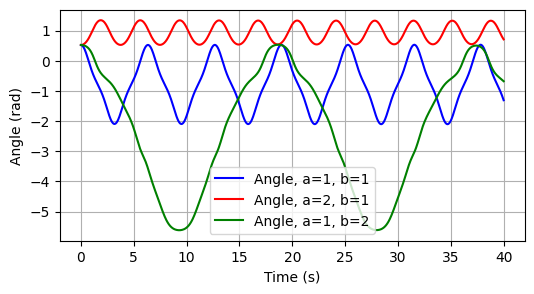

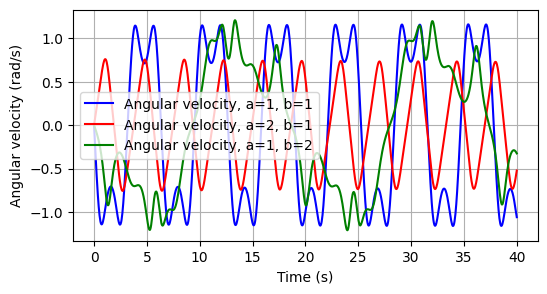

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g, h = 9.81, 0.5  # Gravity and fixed h value

def sigma(alpha, a, b):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

def f(h, sigma_val):
    return np.sqrt(1 - h**2 / sigma_val**2)

def dV_du(alpha, a, b):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha, a, b)
    f_val = f(h, sigma_val)
    
    term1 = - (2 * a**2 * g * u * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * a**2 * g * h**2 * u) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * a**2 * g * u * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

def dV_dv(alpha, a, b):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha, a, b)
    f_val = f(h, sigma_val)
    
    term1 = - (2 * b**2 * g * v * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * b**2 * g * h**2 * v) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * b**2 * g * v * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

def rhs(t, y, a, b):
    alpha, omega = y
    sigma_val = sigma(alpha, a, b)

    if abs(h) <= sigma_val:
        nVn = np.cos(alpha)**2 * dV_dv(alpha, a, b) + np.sin(alpha)**2 * dV_du(alpha, a, b)
        domega_dt = (4 / (a**2 + b**2)) * nVn
    else:
        domega_dt = 0

    return [omega, domega_dt]

# Initial conditions and time span
alpha0, omega0 = np.pi / 6, 0  # Initial angle and angular velocity
t_span = (0, 50)
t_eval = np.linspace(0,40, 1000)

# Different values of a and b
ab_values = [(1, 1), (2, 1), (1, 2)]
colors = ['b', 'r', 'g']
labels = ["a=1, b=1", "a=2, b=1", "a=1, b=2"]

plt.figure(figsize=(6, 3))

for (a, b), color, label in zip(ab_values, colors, labels):
    sol = solve_ivp(rhs, t_span, [alpha0, omega0], t_eval=t_eval, args=(a, b), method='RK45')
    plt.plot(sol.t, sol.y[0], label=rf"Angle, {label}", color=color)

plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6, 3))

for (a, b), color, label in zip(ab_values, colors, labels):
    sol = solve_ivp(rhs, t_span, [alpha0, omega0], t_eval=t_eval, args=(a, b), method='RK45')
    plt.plot(sol.t, sol.y[1], label=f"Angular velocity, {label}", color=color)

plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.legend()
plt.grid()
plt.show()

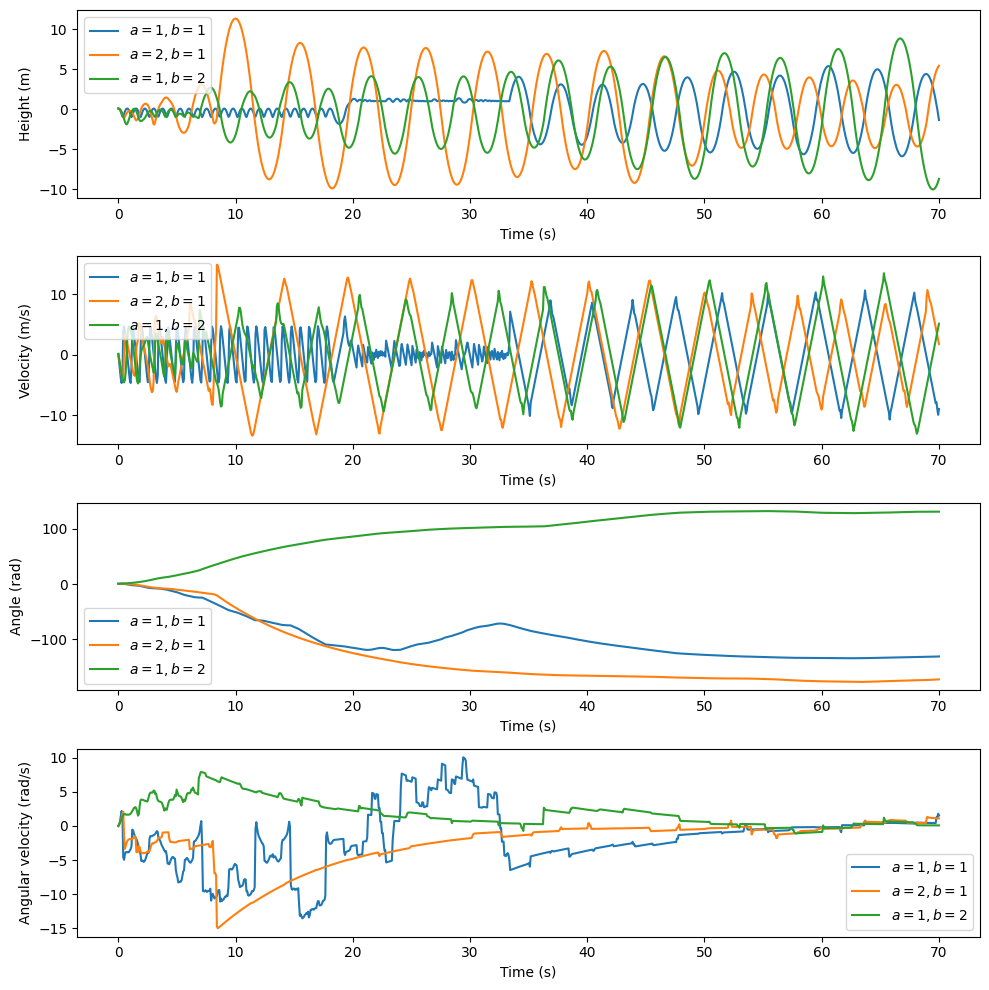

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define a function to compute sigma based on a and b
def sigma(alpha, a, b):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

# Define a function to compute f(h, sigma_val)
def f(h, sigma_val):
    return np.sqrt(1 - h**2 / sigma_val**2)

# Define partial derivatives of V with respect to u and v
def dV_du(alpha, a, b, h, g):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha, a, b)
    f_val = f(h, sigma_val)
    
    term1 = - (2 * a**2 * g * u * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * a**2 * g * h**2 * u) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * a**2 * g * u * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

def dV_dv(alpha, a, b, h, g):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha, a, b)
    f_val = f(h, sigma_val)
    
    term1 = - (2 * b**2 * g * v * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * b**2 * g * h**2 * v) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * b**2 * g * v * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

# Right-hand side of the equation for coupled system
def rhs(t, y, params):
    alpha, omega, h, v = y
    sigma_val = sigma(alpha, params['a'], params['b'])
    
    # nVn for |h| <= sigma
    if abs(h) <= sigma_val:
        nVn = np.cos(alpha)**2 * dV_dv(alpha, params['a'], params['b'], h, params['g']) + np.sin(alpha)**2 * dV_du(alpha, params['a'], params['b'], h, params['g'])
        domega_dt = (4 / (params['a']**2 + params['b']**2)) * nVn - params['gamma'] * omega  # Damping term added here
    else:
        # nVn is 0 for |h| > sigma
        domega_dt = -params['gamma'] * omega  # Damping only in angular velocity
    
    if abs(h) < sigma_val:
        f_val = f(h, sigma_val)
        if f_val == 0:
            dh_dt = v
            dv_dt = -params['g'] * np.sign(h)
        else:
            term1 = - (2 * params['g'] * (sigma_val**2 * (h + np.pi) + sigma_val**3 * np.arcsin(h / sigma_val) * f_val - 2 * np.pi * h**2)) / (np.pi * sigma_val**3 * f_val)
            term2 = (4 * params['g'] * h / (np.pi * sigma_val)) * f_val
            dh_dt = v
            dv_dt = term1 + term2
    else:
        dh_dt = v
        dv_dt = -params['g'] * np.sign(h)

    return [omega, domega_dt, dh_dt, dv_dt]

# Solve the system of ODEs
def solve_system(params):
    initial_conditions = [params['alpha0'], params['omega0'], params['h0'], params['v0']]
    t_span = params['t_span']
    t_eval = params['t_eval']
    sol = solve_ivp(rhs, t_span, initial_conditions, t_eval=t_eval, method='RK45', args=(params,))
    return sol

# Plot different parameter sets
def plot_multiple_solutions():
    param_sets = [
        {'a': 1, 'b': 1, 'alpha0': np.pi / 4, 'omega0': 0, 'h0': 0.1, 'v0': 0.1, 'g': 9.81, 'gamma': 0.1, 't_span': (0,70), 't_eval': np.linspace(0, 70, 1000)},
        {'a': 2, 'b': 1, 'alpha0': np.pi / 4, 'omega0': 0, 'h0': 0.1, 'v0': 0.1, 'g': 9.81, 'gamma': 0.1, 't_span': (0,70), 't_eval': np.linspace(0, 70, 1000)},
        {'a': 1, 'b': 2, 'alpha0': np.pi / 4, 'omega0': 0, 'h0': 0.1, 'v0': 0.1, 'g': 9.81, 'gamma': 0.1, 't_span': (0,70), 't_eval': np.linspace(0, 70, 1000)},
    ]
    
    plt.figure(figsize=(10, 10))

    for i, params in enumerate(param_sets, 1):
        sol = solve_system(params=params)
        
        time = sol.t
        alpha_sol = sol.y[0]
        omega_sol = sol.y[1]
        h_sol = sol.y[2]
        v_sol = sol.y[3]
        
        plt.subplot(4, 1, 1)
        plt.plot(time, h_sol, label=f'$a={params["a"]}, b={params["b"]}$')
        plt.xlabel('Time (s)')
        plt.ylabel('Height (m)')
        plt.legend()

        plt.subplot(4, 1, 2)
        plt.plot(time, v_sol, label=f'$a={params["a"]}, b={params["b"]}$')
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.legend()

        plt.subplot(4, 1, 3)
        plt.plot(time, alpha_sol, label=f'$a={params["a"]}, b={params["b"]}$')
        plt.xlabel('Time (s)')
        plt.ylabel('Angle (rad)')
        plt.legend()

        plt.subplot(4, 1, 4)
        plt.plot(time, omega_sol, label=f'$a={params["a"]}, b={params["b"]}$')
        plt.xlabel('Time (s)')
        plt.ylabel('Angular velocity (rad/s)')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    plot_multiple_solutions()



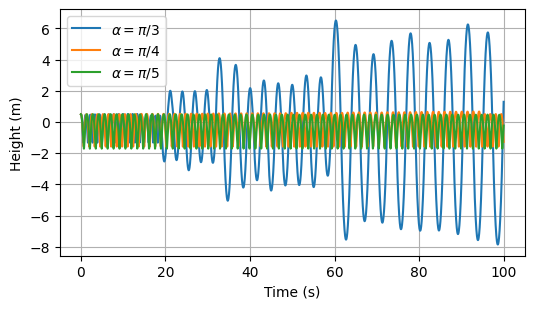

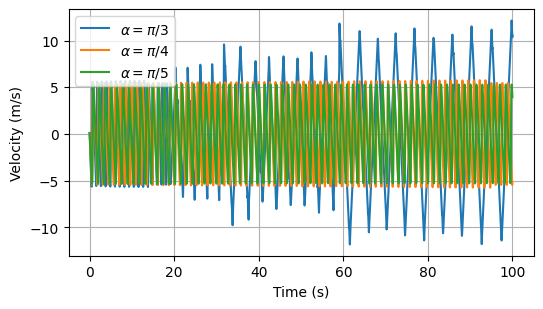

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def sigma(alpha, a, b):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

def f(h, sigma):
    return np.sqrt(1 - (h / sigma)**2) if abs(h) < sigma else 0

def h_equation(t, y, alpha, a, b, g):
    h, v = y
    sigma_val = sigma(alpha, a, b)
    
    if abs(h) < sigma_val:
        f_val = f(h, sigma_val)
        if f_val == 0:
            return [v, -g * np.sign(h)]
        term1 = - (2 * g * (sigma_val**2 * (h + np.pi) + sigma_val**3 * np.arcsin(h / sigma_val) * f_val - 2 * np.pi * h**2)) / (np.pi * sigma_val**3 * f_val)
        term2 = (4 * g * h / (np.pi * sigma_val)) * f_val
        return [v, term1 + term2]
    else:
        return [v, -g * np.sign(h)]

def solve_h(a, b, alpha, h0, v0, g=9.81, t_max=100, dt=0.01):
    t_span = (0, t_max)
    t_eval = np.arange(0, t_max, dt)
    sol = solve_ivp(h_equation, t_span, [h0, v0], t_eval=t_eval, args=(alpha, a, b, g), method='RK45')
    return sol

# Parameters
a, b = 2.0, 1.0  # Fixed values of a and b
alphas = [np.pi / 3, np.pi / 4, np.pi / 5]  # Different angles
alpha_labels = [r"$\alpha = \pi/3$", r"$\alpha = \pi/4$", r"$\alpha = \pi/5$"]  # Labels for legend
h0, v0 = 0.5, 0.1  # Initial conditions

# Plot h(t) for different alphas
plt.figure(figsize=(6, 3.2))
for alpha, label in zip(alphas, alpha_labels):
    sol = solve_h(a, b, alpha, h0, v0)
    plt.plot(sol.t, sol.y[0], label=label)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid()
plt.show()

# Plot v(t) for different alphas
plt.figure(figsize=(6, 3.2))
for alpha, label in zip(alphas, alpha_labels):
    sol = solve_h(a, b, alpha, h0, v0)
    plt.plot(sol.t, sol.y[1], label=label)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()


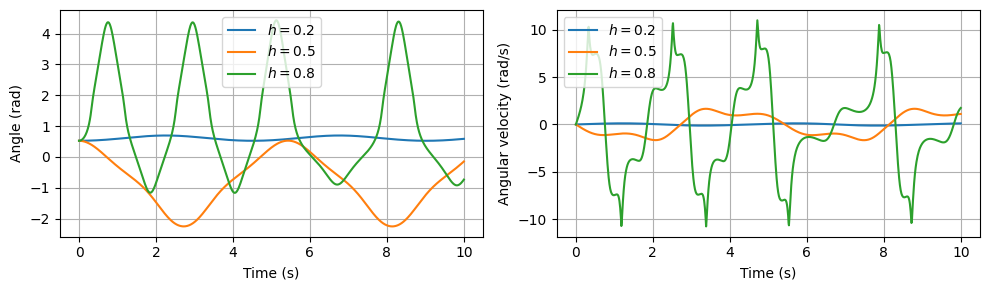

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
a, b, g = 1.0, 0.8, 9.81  # Example values
h_values = [0.2, 0.5, 0.8]  # Different h values to test

# Define sigma and f(h, sigma)
def sigma(alpha):
    return np.sqrt(a**2 * np.cos(alpha)**2 + b**2 * np.sin(alpha)**2)

def f(h, sigma_val):
    return np.sqrt(1 - h**2 / sigma_val**2) if abs(h) <= sigma_val else 0

# Partial derivatives of V
def dV_du(alpha, h):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha)
    f_val = f(h, sigma_val)
    
    if f_val == 0:
        return 0

    term1 = - (2 * a**2 * g * u * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * a**2 * g * h**2 * u) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * a**2 * g * u * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

def dV_dv(alpha, h):
    u, v = np.cos(alpha), np.sin(alpha)
    sigma_val = sigma(alpha)
    f_val = f(h, sigma_val)
    
    if f_val == 0:
        return 0

    term1 = - (2 * b**2 * g * v * (a**2 * h * u**2 + b**2 * h * v**2 - 2 * h**3)) / ((a**2 * u**2 + b**2 * v**2)**(5/2) * f_val)
    term2 = - (2 * b**2 * g * h**2 * v) / (np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2) * f_val)
    term3 = (4 * b**2 * g * v * (a**2 * u**2 + b**2 * v**2 + 2 * h**2) * f_val) / (3 * np.pi * (a**2 * u**2 + b**2 * v**2)**(3/2))
    
    return term1 + term2 + term3

# Right-hand side of the equation
def rhs(t, y, h):
    alpha, omega = y
    sigma_val = sigma(alpha)

    if abs(h) <= sigma_val:
        nVn = np.cos(alpha)**2 * dV_dv(alpha, h) + np.sin(alpha)**2 * dV_du(alpha, h)
        domega_dt = (4 / (a**2 + b**2)) * nVn
    else:
        domega_dt = 0  # No force outside sigma range

    return [omega, domega_dt]

# Time parameters
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Initial conditions
alpha0, omega0 = np.pi / 6, 0

# Create figure
plt.figure(figsize=(10, 3))

# Left plot: Angle vs. Time
plt.subplot(1, 2, 1)
for h in h_values:
    sol = solve_ivp(rhs, t_span, [alpha0, omega0], t_eval=t_eval, args=(h,), method='RK45')
    plt.plot(sol.t, sol.y[0], label=fr"$h = {h}$")

plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.grid()

# Right plot: Angular Velocity vs. Time
plt.subplot(1, 2, 2)
for h in h_values:
    sol = solve_ivp(rhs, t_span, [alpha0, omega0], t_eval=t_eval, args=(h,), method='RK45')
    plt.plot(sol.t, sol.y[1], label=fr"$h = {h}$")

plt.xlabel("Time (s)")
plt.ylabel("Angular velocity (rad/s)")
plt.legend()
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()
